#### As the mesh density increases, CD does not converge (unlike CL).

Import of the needed libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator

from pyvlm.vlm import PyVLM

Definition of the geometry of the wing:
    
        Y  ^  D +--+
           |   /    \
           |  /      \
           | /        \
           |/          \
         C +------------+
           +-------------------->
                                X

In [18]:
C = np.array([0, 1.03])
D = np.array([0.414, 8.14])
leading_edges_coord = [C, D]
chord_lengths = [2.15, 1.24]

The method is applied to increasingly dense mesh grids:

In [29]:
example_wing = PyVLM()

N = 9
X, Y = np.zeros(N-1), np.zeros(N-1)  # to store the meshgrid
Zl, Zd = np.zeros((N-1, N-1)), np.zeros((N-1, N-1))  # to store the values of CL and CD

for n in range(1, N):  # number of panels (chordwise)
    X[n-1] = n
    for m in range(1, N):  # number of panels (spanwise)
        Y[m-1] = m
        
        example_wing.add_wing(leading_edges_coord, chord_lengths, n, m)  # a wing is defined for each mesh density
                                                                         # configuration (n, m)
        CL, CD = example_wing.vlm(alpha=0)  # the VLM method is called for an alpha=0
        Zl[n-1][m-1], Zd[n-1][m-1] = CL, CD
        # print('n =%2s  m =%2s  CL = %6.3f  CD = %6.3f ' % (i, j, CL, CD))
        example_wing.reset()  # the VLM attributes are deleted

The results are plotted:

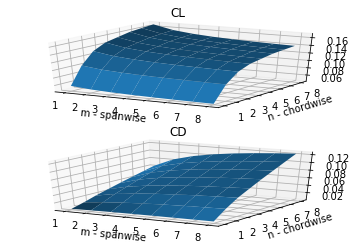

In [30]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1, projection='3d')
ax2 = fig.add_subplot(2, 1, 2, projection='3d')

X, Y = np.meshgrid(X, Y)

ax1.plot_surface(X, Y, Zl)
ax1.set_title("CL")

ax2.plot_surface(X, Y, Zd)
ax2.set_title("CD")

ax1.set_xlabel('m - spanwise')
ax1.set_ylabel('n - chordwise')
ax2.set_xlabel('m - spanwise')
ax2.set_ylabel('n - chordwise')

ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

ax1.set_zlabel('cl')
ax2.set_zlabel('cd')

plt.show()

As it can be appreciated, CD does not converge when the number of chordwise panels increases.